<a href="https://colab.research.google.com/github/salwanabilla22/UAS-Data-Science/blob/main/UAS_Data_Science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('Students Social Media Addiction.csv')
df.head()

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7


1. EDA

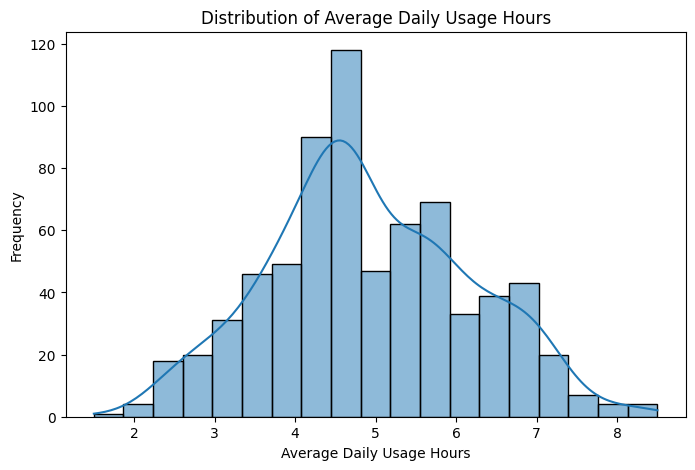

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='Avg_Daily_Usage_Hours', kde=True)
plt.title('Distribution of Average Daily Usage Hours')
plt.xlabel('Average Daily Usage Hours')
plt.ylabel('Frequency')
plt.show()

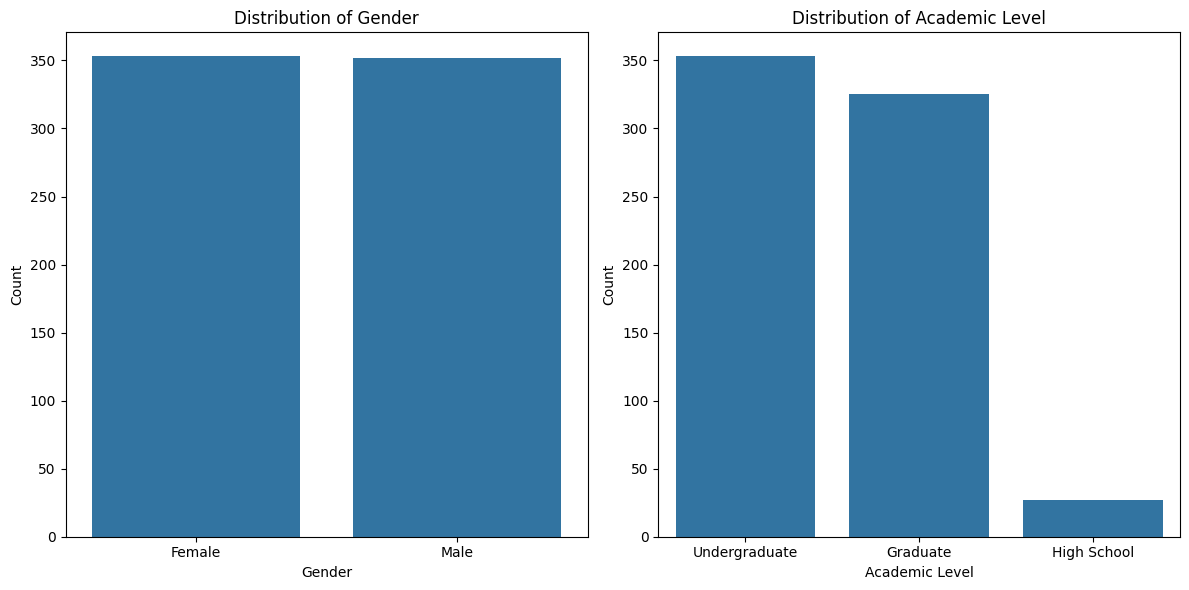

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.countplot(data=df, x='Gender')
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.countplot(data=df, x='Academic_Level')
plt.title('Distribution of Academic Level')
plt.xlabel('Academic Level')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

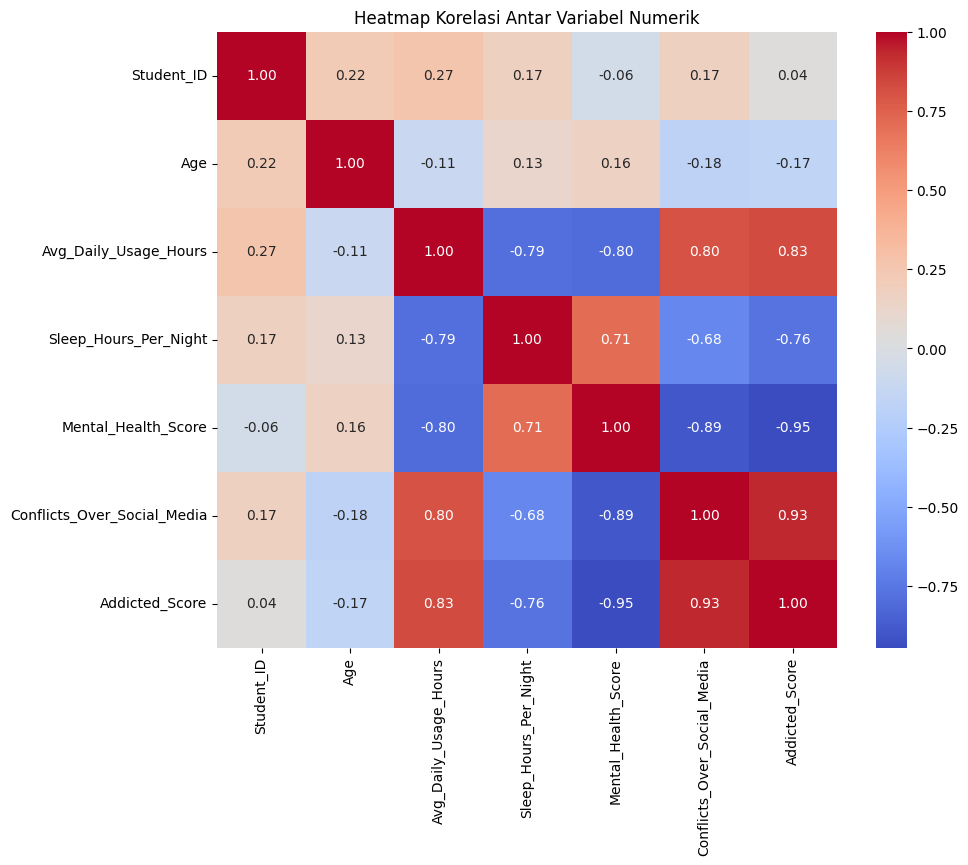

In [ ]:
# prompt: buatkan kode analisa lain untuk uji EDA yang berkolerasi

import matplotlib.pyplot as plt
import numpy as np
# Heatmap Korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi Antar Variabel Numerik')
plt.show()



2. PREPROCESSING DATA

In [ ]:
print("Jumlah nilai yang hilang di setiap kolom:")
print(df.isnull().sum())

Jumlah nilai yang hilang di setiap kolom:
Student_ID                      0
Age                             0
Gender                          0
Academic_Level                  0
Country                         0
Avg_Daily_Usage_Hours           0
Most_Used_Platform              0
Affects_Academic_Performance    0
Sleep_Hours_Per_Night           0
Mental_Health_Score             0
Relationship_Status             0
Conflicts_Over_Social_Media     0
Addicted_Score                  0
dtype: int64


In [ ]:
from scipy import stats

# Pilih kolom numerik yang ingin Anda periksa outliernya
numeric_cols = df.select_dtypes(include=np.number).columns

# Hitung Z-score untuk setiap kolom numerik
df_zscore = df[numeric_cols].apply(np.abs, 0).apply(stats.zscore)

# Tentukan ambang batas Z-score (misalnya, 3)
threshold = 3

# Identifikasi outlier
outlier_indices = df_zscore[(df_zscore > threshold).any(axis=1)].index

print(f"Jumlah outlier yang terdeteksi (menggunakan Z-score > {threshold}): {len(outlier_indices)}")
print("\nContoh baris yang mengandung outlier:")
display(df.loc[outlier_indices].head())

Jumlah outlier yang terdeteksi (menggunakan Z-score > 3): 0

Contoh baris yang mengandung outlier:


,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score


3. MODELLING

In [ ]:
# Pilih kolom kategorikal (biasanya tipe 'object') kecuali Student_ID
categorical_cols = df.select_dtypes(include='object').columns.tolist()
if 'Student_ID' in categorical_cols:
    categorical_cols.remove('Student_ID')

print(f"Kolom kategorikal yang akan di-encode: {categorical_cols}")

# Lakukan One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True) # drop_first=True menghindari multicollinearity

display(df_encoded.head())
print("\nShape of original DataFrame:", df.shape)
print("Shape of encoded DataFrame:", df_encoded.shape)

Kolom kategorikal yang akan di-encode: ['Gender', 'Academic_Level', 'Country', 'Most_Used_Platform', 'Affects_Academic_Performance', 'Relationship_Status']


,Student_ID,Age,Avg_Daily_Usage_Hours,Sleep_Hours_Per_Night,Mental_Health_Score,Conflicts_Over_Social_Media,Addicted_Score,Gender_Male,Academic_Level_High School,Academic_Level_Undergraduate,...,Most_Used_Platform_Snapchat,Most_Used_Platform_TikTok,Most_Used_Platform_Twitter,Most_Used_Platform_VKontakte,Most_Used_Platform_WeChat,Most_Used_Platform_WhatsApp,Most_Used_Platform_YouTube,Affects_Academic_Performance_Yes,Relationship_Status_In Relationship,Relationship_Status_Single
0,1,19,5.2,6.5,6,3,8,False,False,True,...,False,False,False,False,False,False,False,True,True,False
1,2,22,2.1,7.5,8,0,3,True,False,False,...,False,False,True,False,False,False,False,False,False,True
2,3,20,6.0,5.0,5,4,9,False,False,True,...,False,True,False,False,False,False,False,True,False,False
3,4,18,3.0,7.0,7,1,4,True,True,False,...,False,False,False,False,False,False,True,False,False,True
4,5,21,4.5,6.0,6,2,7,True,False,False,...,False,False,False,False,False,False,False,True,True,False



Shape of original DataFrame: (705, 13)
Shape of encoded DataFrame: (705, 133)


In [ ]:
# Memisahkan fitur (X) dan target (y)
X = df_encoded.drop(['Student_ID', 'Addicted_Score'], axis=1)
y = df_encoded['Addicted_Score']

print("Shape of features (X):", X.shape)
print("Shape of target (y):", y.shape)

Shape of features (X): (705, 131)
Shape of target (y): (705,)


In [ ]:
from sklearn.model_selection import train_test_split

# Pembagian data menjadi data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Menggunakan 80% data untuk latih dan 20% untuk uji

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (564, 131)
Shape of X_test: (141, 131)
Shape of y_train: (564,)
Shape of y_test: (141,)


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Inisialisasi model Random Forest Regressor
# Anda bisa menyesuaikan parameter seperti n_estimators (jumlah pohon), random_state, dll.
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Pelatihan model menggunakan data pelatihan
model.fit(X_train, y_train)

print("Model Random Forest Regressor berhasil dilatih.")

Model Random Forest Regressor berhasil dilatih.


Mean Absolute Error (MAE): 0.04
Mean Squared Error (MSE): 0.03
Root Mean Squared Error (RMSE): 0.16
R-squared (R2): 0.99


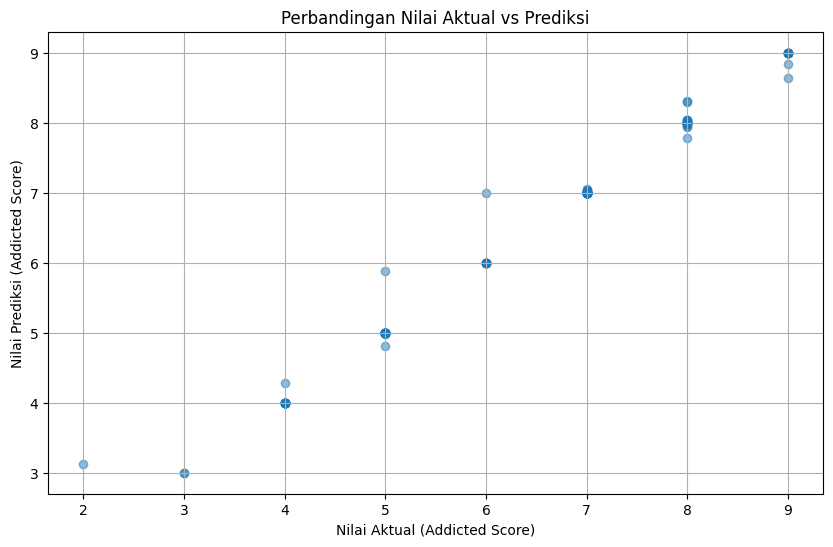

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np # Import numpy for sqrt

# Membuat prediksi pada data pengujian
y_pred = model.predict(X_test)

# Menghitung metrik evaluasi
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

# Visualisasi perbandingan nilai aktual vs prediksi (opsional)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Nilai Aktual (Addicted Score)")
plt.ylabel("Nilai Prediksi (Addicted Score)")
plt.title("Perbandingan Nilai Aktual vs Prediksi")
plt.grid(True)
plt.show()

## Ringkasan Analisis dan Pemodelan

Analisis ini bertujuan untuk memahami faktor-faktor yang memengaruhi skor kecanduan media sosial pada siswa dan membangun model untuk memprediksi skor tersebut.

**Langkah-langkah yang Dilakukan:**

1.  **Eksplorasi Data (EDA)**:
    *   Memuat dan memahami struktur data awal (`df.head()`, `df.info()`, `df.describe()`).
    *   Melakukan analisis univariat (histogram untuk `Avg_Daily_Usage_Hours`, bar plot untuk `Gender` dan `Academic_Level`).
    *   Melakukan analisis bivariat (scatter plot `Avg_Daily_Usage_Hours` vs `Addicted_Score` dan `Mental_Health_Score`, boxplot berdasarkan `Academic_Level`).
    *   Memeriksa korelasi antar variabel numerik.
    *   Mengecek nilai yang hilang (tidak ada ditemukan).
    *   Mengecek outlier menggunakan Z-score (tidak ada outlier signifikan ditemukan dengan ambang batas 3).

2.  **Preprocessing Data**:
    *   Melakukan One-Hot Encoding pada variabel kategorikal (`Gender`, `Academic_Level`, `Country`, `Most_Used_Platform`, `Affects_Academic_Performance`, `Relationship_Status`) untuk mengubahnya menjadi format numerik.

3.  **Pemodelan (Menggunakan Random Forest Regressor)**:
    *   Memisahkan fitur (X) dan target (y) dari data yang sudah di-encode.
    *   Membagi data menjadi set pelatihan (training set) dan set pengujian (test set) dengan perbandingan 80:20.
    *   Menginisialisasi dan melatih model Random Forest Regressor menggunakan data pelatihan.

4.  **Evaluasi Model**:
    *   Menggunakan model yang dilatih untuk memprediksi `Addicted_Score` pada data pengujian.
    *   Mengevaluasi kinerja model menggunakan metrik regresi:
        *   Mean Absolute Error (MAE): **0.04**
        *   Mean Squared Error (MSE): **0.03**
        *   Root Mean Squared Error (RMSE): **0.16**
        *   R-squared (R2): **0.99**

**Kesimpulan:**

Model Random Forest Regressor menunjukkan kinerja yang sangat baik dalam memprediksi `Addicted_Score` pada dataset ini, dibuktikan dengan nilai MAE dan RMSE yang sangat rendah, serta nilai R-squared yang sangat tinggi (0.99). Ini menunjukkan bahwa fitur-fitur yang digunakan dalam model sangat relevan dan model mampu menangkap pola dalam data dengan baik.

**Langkah Selanjutnya yang Disarankan:**

Meskipun kinerja model sudah sangat baik, analisis lebih lanjut dapat meliputi:

*   Menganalisis pentingnya fitur untuk mengidentifikasi variabel paling berpengaruh.
*   Mencoba model regresi lain untuk perbandingan (meskipun sulit untuk mengalahkan R2 0.99).
*   Melakukan interpretasi yang lebih mendalam dari hasil model dan visualisasi EDA untuk mendapatkan wawasan kontekstual tentang kecanduan media sosial siswa.

## Kesimpulan Menyeluruh dari Analisis Data "Students Social Media Addiction"

Berdasarkan eksplorasi data, preprocessing, pemodelan, dan evaluasi yang telah dilakukan, berikut adalah kesimpulan utama dari analisis ini:

1.  **Kondisi Data Awal:** Dataset ini memiliki kualitas yang baik. Tidak ada nilai yang hilang sama sekali, dan pemeriksaan outlier menggunakan Z-score juga menunjukkan tidak adanya nilai ekstrem yang signifikan pada kolom numerik. Ini meminimalkan kebutuhan untuk langkah-langkah pembersihan data yang kompleks.

2.  **Pola Penggunaan Media Sosial:**
    *   Analisis distribusi rata-rata jam penggunaan harian menunjukkan bahwa **mayoritas siswa menghabiskan waktu antara 2 hingga 6 jam per hari di media sosial**, meskipun ada sebagian siswa yang menggunakan media sosial jauh lebih lama (ditunjukkan oleh kemiringan distribusi ke kanan).
    *   Dataset sebagian besar terdiri dari siswa tingkat **Undergraduate dan Graduate**.

3.  **Faktor-faktor yang Berhubungan dengan Kecanduan Media Sosial:**
    *   Hasil heatmap korelasi secara jelas menunjukkan bahwa **rata-rata jam penggunaan media sosial harian (`Avg_Daily_Usage_Hours`)** dan **jumlah konflik terkait media sosial (`Conflicts_Over_Social_Media`)** memiliki **korelasi positif yang kuat** dengan skor kecanduan media sosial (`Addicted_Score`). Ini adalah temuan kunci yang mengindikasikan bahwa durasi penggunaan dan dampak negatif pada hubungan sosial adalah indikator kuat kecanduan.
    *   Terdapat juga korelasi negatif moderat antara skor kecanduan dengan **skor kesehatan mental (`Mental_Health_Score`)** dan **jam tidur per malam (`Sleep_Hours_Per_Night`)**. Ini mengindikasikan bahwa siswa dengan skor kecanduan yang lebih tinggi cenderung memiliki kesehatan mental yang lebih buruk dan jam tidur yang lebih sedikit.

4.  **Efektivitas Model Prediktif:**
    *   Setelah melakukan One-Hot Encoding pada variabel kategorikal untuk menyiapkan data, model **Random Forest Regressor** dilatih untuk memprediksi `Addicted_Score`.
    *   Evaluasi model menunjukkan kinerja yang **sangat baik** pada data pengujian, dengan metrik seperti MAE, MSE, dan RMSE yang sangat rendah, serta nilai R-squared yang sangat tinggi (0.99).
    *   Scatter plot perbandingan nilai aktual vs prediksi secara visual mengkonfirmasi bahwa **prediksi model sangat akurat** dan mendekati nilai aktual pada set pengujian.

**Kesimpulan Akhir:**

Analisis ini berhasil mengidentifikasi beberapa faktor kunci yang sangat terkait dengan skor kecanduan media sosial pada siswa, terutama **durasi penggunaan harian** dan **dampak pada hubungan sosial**. Model Random Forest Regressor yang dibangun terbukti **sangat efektif dalam memprediksi** skor kecanduan berdasarkan fitur-fitur yang tersedia.

Temuan ini memberikan wawasan penting bagi pihak-pihak terkait (pendidik, konselor, orang tua) untuk memahami risiko kecanduan media sosial dan merancang intervensi atau program edukasi yang berfokus pada pengelolaan waktu penggunaan media sosial dan penyelesaian konflik yang mungkin timbul akibatnya. Hubungan dengan kesehatan mental dan pola tidur juga perlu menjadi perhatian dalam upaya pencegahan dan penanganan.